In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

__author__ = 'So Negishi'
__copyright__ = 'Copyright 2019, MATH323: Algorithmic Graph Theory'
__credits__ = ['So Negishi']
__license__ = 'MIT'
__version__ = '0.0.1'
__maintainer__ = 'So Negishi'
__email__ = 'sonegishi_2020@depauw.edu'
__status__ = 'Development'

In [159]:
%matplotlib inline

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Dijkstra's Algorithm

In [134]:
def summarize(results):
    nodes = list()
    distances = list()
    prevs = list()
    for (key, val) in results.items():
        nodes.append(key)
        distances.append(val['distance'])
        prevs.append(val['prev'])
    return pd.DataFrame.from_dict({'d(i)': distances, 'prev(i)': prevs}, orient='index', columns=nodes)

In [135]:
def dijkstra_algorithm(G, source, target):
    nodes = dict()
    for node in G.nodes():
        nodes[node] = {
            'distance': 0 if node == source else float('inf'),
            'prev': 0 if node == source else None
        }
    Q = list(G.nodes())
    while Q:
        u = float('inf')
        for q in Q:
            curr = nodes[q]['distance']
            u = q if curr < u else u
        if u == float('inf'):
            break
        Q.remove(u)
        for (v, w) in G[u].items():
            length = w['weight']
            if nodes[v]['distance'] > nodes[u]['distance'] + length:
                nodes[v]['distance'] = nodes[u]['distance'] + length
                nodes[v]['prev'] = u
    return summarize(nodes)

# Problem Set 6.3B: Problem 1 (pg. 250)

In [136]:
G_one = nx.DiGraph()
G_one.add_nodes_from([i for i in range(1, 9)])
G_one.add_weighted_edges_from([(1, 2, 1), (1, 3, 2)])
G_one.add_weighted_edges_from([(2, 3, 1), (2, 4, 5), (2, 5, 2)])
G_one.add_weighted_edges_from([(3, 4, 2), (3, 5, 1), (3, 6, 4)])
G_one.add_weighted_edges_from([(4, 5, 3), (4, 6, 6), (4, 7, 8)])
G_one.add_weighted_edges_from([(5, 6, 3), (5, 7, 7)])
G_one.add_weighted_edges_from([(6, 7, 5), (6, 8, 2)])
G_one.add_weighted_edges_from([(7, 8, 6)])

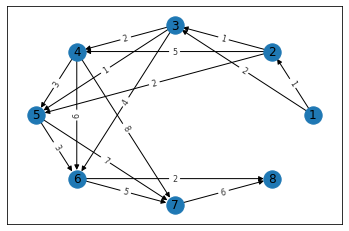

In [137]:
pos_one = nx.shell_layout(G_one)
nx.draw_networkx_nodes(G_one, pos=pos_one)
nx.draw_networkx_edges(G_one, pos=pos_one)
nx.draw_networkx_labels(G_one, pos=pos_one)
edge_labels = {
    (edge[0], edge[1]): edge[2]['weight'] for edge in G_one.edges(data=True)
}
nx.draw_networkx_edge_labels(G_one, pos=pos_one, edge_labels=edge_labels, font_size=8, alpha=0.8)
plt.show()

## 1(a). (pg. 250)

In [138]:
nx.dijkstra_path(G_one, 1, 8)

[1, 3, 6, 8]

In [139]:
dijkstra_algorithm(G_one, 1, 8)

,1,2,3,4,5,6,7,8
d(i),0,1,2,4,3,6,10,8
prev(i),0,1,1,3,2,3,5,6


## 1(b). (pg. 250)

In [140]:
nx.dijkstra_path(G_one, 1, 6)

[1, 3, 6]

In [141]:
dijkstra_algorithm(G_one, 1, 6)

,1,2,3,4,5,6,7,8
d(i),0,1,2,4,3,6,10,8
prev(i),0,1,1,3,2,3,5,6


## 1(c). (pg. 251)

In [142]:
nx.dijkstra_path(G_one, 4, 8)

[4, 6, 8]

In [143]:
dijkstra_algorithm(G_one, 4, 8)

,1,2,3,4,5,6,7,8
d(i),inf,inf,inf,0,3,6,8,8
prev(i),NaN,NaN,NaN,0,4,4,4,6


## 1(d). (pg. 251)

In [144]:
nx.dijkstra_path(G_one, 2, 6)

[2, 3, 6]

In [145]:
dijkstra_algorithm(G_one, 2, 6)

,1,2,3,4,5,6,7,8
d(i),inf,0,1,3,2,5,9,7
prev(i),NaN,0,2,3,2,5,5,6


# Problem Set 6.3B: Problem 2 (pg. 251)

In [146]:
G_two = nx.DiGraph()
G_two.add_nodes_from([i for i in range(1, 8)])
G_two.add_weighted_edges_from([(1, 2, 5), (1, 3, 1)])
G_two.add_weighted_edges_from([(2, 4, 7), (2, 5, 1), (2, 6, 6)])
G_two.add_weighted_edges_from([(3, 2, 2), (3, 4, 6), (3, 5, 7)])
G_two.add_weighted_edges_from([(4, 3, 7), (4, 6, 4), (4, 7, 6)])
G_two.add_weighted_edges_from([(5, 4, 3), (5, 6, 5), (5, 7, 9)])
G_two.add_weighted_edges_from([(6, 7, 2)])

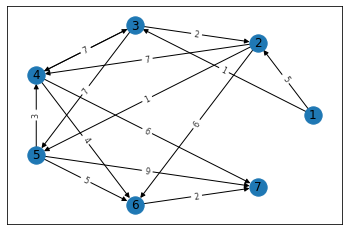

In [147]:
pos_two = nx.shell_layout(G_two)
nx.draw_networkx_nodes(G_two, pos=pos_two)
nx.draw_networkx_edges(G_two, pos=pos_two)
nx.draw_networkx_labels(G_two, pos=pos_two)
edge_labels = {
    (edge[0], edge[1]): edge[2]['weight'] for edge in G_two.edges(data=True)
}
nx.draw_networkx_edge_labels(G_two, pos=pos_two, edge_labels=edge_labels, font_size=8, alpha=0.8)
plt.show()

In [148]:
for head in range(2, 8):
    print(f'SPF (1 -> {head}):', nx.dijkstra_path(G_two, 1, head))

SPF (1 -> 2): [1, 3, 2]
SPF (1 -> 3): [1, 3]
SPF (1 -> 4): [1, 3, 4]
SPF (1 -> 5): [1, 3, 2, 5]
SPF (1 -> 6): [1, 3, 2, 6]
SPF (1 -> 7): [1, 3, 2, 6, 7]


In [152]:
for head in range(2, 8):
    print(f'SPF (1 -> {head}):\n{dijkstra_algorithm(G_two, 1, head)}\n\n', )

SPF (1 -> 2):
         1  2  3  4  5  6   7
d(i)     0  3  1  7  4  9  11
prev(i)  0  3  1  3  2  2   6


SPF (1 -> 3):
         1  2  3  4  5  6   7
d(i)     0  3  1  7  4  9  11
prev(i)  0  3  1  3  2  2   6


SPF (1 -> 4):
         1  2  3  4  5  6   7
d(i)     0  3  1  7  4  9  11
prev(i)  0  3  1  3  2  2   6


SPF (1 -> 5):
         1  2  3  4  5  6   7
d(i)     0  3  1  7  4  9  11
prev(i)  0  3  1  3  2  2   6


SPF (1 -> 6):
         1  2  3  4  5  6   7
d(i)     0  3  1  7  4  9  11
prev(i)  0  3  1  3  2  2   6


SPF (1 -> 7):
         1  2  3  4  5  6   7
d(i)     0  3  1  7  4  9  11
prev(i)  0  3  1  3  2  2   6




# All Pairs Lable Correcting Algorithm

In [210]:
def all_pair_label_correcting(G):    
    len_nodes = len(G.nodes())
    mtx = np.full((len_nodes, len_nodes), float('inf'))
    np.fill_diagonal(mtx, 0)
    
    directed_G = G.to_directed()
    for u in directed_G.nodes():
        for (v, w) in directed_G[u].items():
            mtx[u-1][v-1] = w['weight']
    
    u, v, k = 0, 0, 0
    while mtx[u][v] > mtx[u][k] + mtx[k][v] > 0:
        mtx[u][v] = mtx[u][v] + mtx[k][v]
    
    nodes_range = range(1, len_nodes + 1)
    return pd.DataFrame(mtx,  index=nodes_range, columns=nodes_range)

In [211]:
all_pair_label_correcting(G_three)

,1,2,3,4,5,6
1,0.0,700.0,200.0,inf,inf,inf
2,700.0,0.0,300.0,200.0,inf,400.0
3,200.0,300.0,0.0,700.0,600.0,inf
4,inf,200.0,700.0,0.0,300.0,100.0
5,inf,inf,600.0,300.0,0.0,500.0
6,inf,400.0,inf,100.0,500.0,0.0


# Problem Set 6.3C: Problem 3 (pg. 256)

The Tell-All mobile-phone company services six geographical areas. The satellite distances (in miles) among the six areas are given in Figure 6.23. Tell-All needs to determine the most efficient message routes that should be established between each two areas in the network.

In [18]:
G_three = nx.Graph()
G_three.add_nodes_from([i for i in range(1, 7)])
G_three.add_weighted_edges_from([(1, 2, 700), (1, 3, 200)])
G_three.add_weighted_edges_from([(2, 3, 300), (2, 4, 200), (2, 6, 400)])
G_three.add_weighted_edges_from([(3, 4, 700), (3, 5, 600)])
G_three.add_weighted_edges_from([(4, 5, 300), (4, 6, 100)])
G_three.add_weighted_edges_from([(5, 6, 500)])

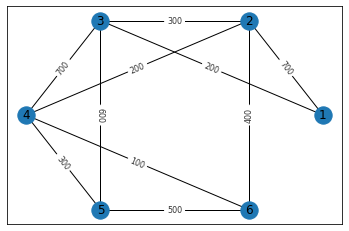

In [19]:
pos_three = nx.shell_layout(G_three)
nx.draw_networkx_nodes(G_three, pos=pos_three)
nx.draw_networkx_edges(G_three, pos=pos_three)
nx.draw_networkx_labels(G_three, pos=pos_three)
edge_labels = {
    (edge[0], edge[1]): edge[2]['weight'] for edge in G_three.edges(data=True)
}
nx.draw_networkx_edge_labels(G_three, pos=pos_three, edge_labels=edge_labels, font_size=8, alpha=0.8)
plt.show()

In [ ]:
all_pair_label_correcting(G_three)